In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 709.4/709.4 kB 4.4 MB/s eta 0:00:00


In [2]:
from ultralytics import YOLO
import os
from IPython.display import display,Image
from IPython import display
display.clear_output()

In [3]:
!yolo mode = checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 509, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are ('train', 'val', 'predict', 'export', 'track', 'benchmark').

    Arguments received: ['yolo', 'mode', '=', 'checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of ('detect', 'segment', 'classify', 'pose', 'obb')
                MODE (required) is one of ('train', 'val', 'predict', 'export', 'track', 'benchmark')
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all AR

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import glob
from PIL import Image

In [5]:
!pip install -q kaggle

In [6]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mvsravya","key":"eae6b18c1cc78f156faa4d7799572411"}'}

In [7]:
!mkdir ~/.kaggle

In [9]:
!cp kaggle.json ~/.kaggle

In [10]:
!kaggle datasets download -d pkdarabi/road-mark-detection

 90% 145M/161M [00:01<00:00, 96.3MB/s]
100% 161M/161M [00:01<00:00, 109MB/s] 


In [11]:
!unzip road-mark-detection.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/images/161b_jpg.rf.85f842102d7d7c6a3a8f9c93529c75b2.jpg  
  inflating: train/images/162a_jpg.rf.03425938f4f2d24be2e6c8a1686402ac.jpg  
  inflating: train/images/162b_jpg.rf.f9cad32427fe31938c0c0a01a4f47d4f.jpg  
  inflating: train/images/162c_jpg.rf.25bb41e5d59ec73f2db179022e1a9495.jpg  
  inflating: train/images/162d_jpg.rf.1fc78c1c28e08d111a29be67e80acd07.jpg  
  inflating: train/images/163_jpg.rf.6d8b5b078a7941ca338aa7019e8ec146.jpg  
  inflating: train/images/163b_jpg.rf.ae02ecd22abc81561cdc0397ef47a52c.jpg  
  inflating: train/images/164_jpg.rf.dd2ab2f31ab71fa5fbe6767d50a01a2c.jpg  
  inflating: train/images/165_jpg.rf.7a7719222c9d36709a26d63ee4df3567.jpg  
  inflating: train/images/165a_jpg.rf.a5c17a8f88f8d89629b569c341792808.jpg  
  inflating: train/images/165b_jpg.rf.f34b30ab4021c291d53f991b5c29a986.jpg  
  inflating: train/images/165d_jpg.rf.e3f350bc04c489fd5f5f1d714c152032.jpg  
  inflating: train/images/16

In [12]:
yolo_model = YOLO("yolov8l.pt")

100%|██████████| 83.7M/83.7M [00:00<00:00, 231MB/s]


In [13]:
history = yolo_model.train(data='/content/data.yaml',epochs = 50)

Ultralytics YOLOv8.1.8 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/data.yaml, epochs=50, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True

100%|██████████| 755k/755k [00:00<00:00, 16.6MB/s]


Overriding model.yaml nc=80 with nc=13

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.block.C2f             [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.block.C2f             [256, 256, 6, True]           
  5                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.block.C2f             [512, 512, 6, True]           
  7                  -1  1   2360320  ultralytic

100%|██████████| 6.23M/6.23M [00:00<00:00, 85.4MB/s]


AMP: checks passed ✅


train: Scanning /content/train/labels... 2167 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2167/2167 [00:01<00:00, 1618.13it/s]


train: New cache created: /content/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/valid/labels... 417 images, 1 backgrounds, 0 corrupt: 100%|██████████| 417/417 [00:00<00:00, 763.36it/s]

val: New cache created: /content/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000588, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      10.8G      1.163      2.101      1.178         39        640: 100%|██████████| 136/136 [01:50<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09<00:00,  1.41it/s]

                   all        417       1966      0.545      0.565      0.545      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      11.2G      1.134      1.379      1.154         36        640: 100%|██████████| 136/136 [01:44<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.58it/s]


                   all        417       1966      0.543      0.564       0.55      0.338

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      11.2G      1.167      1.328      1.175         38        640: 100%|██████████| 136/136 [01:43<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.63it/s]

                   all        417       1966      0.734       0.56      0.644      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      11.2G      1.149       1.27      1.162         42        640: 100%|██████████| 136/136 [01:43<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.65it/s]

                   all        417       1966      0.693      0.641      0.674      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      11.1G      1.121      1.186      1.152         63        640: 100%|██████████| 136/136 [01:43<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09<00:00,  1.52it/s]


                   all        417       1966      0.674      0.642      0.675      0.443

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      11.1G      1.092      1.154      1.137         30        640: 100%|██████████| 136/136 [01:43<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09<00:00,  1.55it/s]

                   all        417       1966        0.6      0.758      0.711      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      11.2G      1.063      1.094      1.111         32        640: 100%|██████████| 136/136 [01:43<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.59it/s]

                   all        417       1966      0.698      0.656       0.68      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      11.1G      1.054      1.072      1.116         45        640: 100%|██████████| 136/136 [01:43<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.59it/s]

                   all        417       1966       0.64      0.738      0.717      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      11.2G      1.028      1.037        1.1         54        640: 100%|██████████| 136/136 [01:43<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.63it/s]

                   all        417       1966      0.648      0.809       0.76      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      11.2G      1.011     0.9894       1.09         53        640: 100%|██████████| 136/136 [01:43<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.59it/s]

                   all        417       1966      0.745       0.74      0.779      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      11.2G      0.986     0.9803      1.081         42        640: 100%|██████████| 136/136 [01:43<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.59it/s]

                   all        417       1966       0.77      0.654      0.724      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      11.2G     0.9891     0.9441      1.075         56        640: 100%|██████████| 136/136 [01:43<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.60it/s]

                   all        417       1966      0.693      0.775      0.763       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      11.2G     0.9631     0.9298      1.067         56        640: 100%|██████████| 136/136 [01:43<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09<00:00,  1.55it/s]

                   all        417       1966      0.749      0.789      0.786      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      11.2G       0.95     0.8919       1.06         54        640: 100%|██████████| 136/136 [01:43<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.58it/s]

                   all        417       1966      0.711      0.787      0.785      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      11.2G     0.9443     0.8885      1.049         57        640: 100%|██████████| 136/136 [01:43<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.58it/s]

                   all        417       1966      0.726      0.747      0.769      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      11.1G     0.9418     0.8789      1.056         45        640: 100%|██████████| 136/136 [01:43<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.58it/s]

                   all        417       1966      0.705      0.729       0.76      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      11.2G     0.9258     0.8423      1.046         19        640: 100%|██████████| 136/136 [01:43<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.57it/s]

                   all        417       1966      0.831      0.775      0.828      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      11.2G     0.9173     0.8259      1.038         29        640: 100%|██████████| 136/136 [01:43<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.59it/s]

                   all        417       1966      0.706      0.763      0.778       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      11.2G     0.9054     0.8171      1.031         61        640: 100%|██████████| 136/136 [01:43<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.58it/s]

                   all        417       1966      0.854      0.775      0.845      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      11.2G     0.9098     0.8062      1.033         51        640: 100%|██████████| 136/136 [01:43<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.66it/s]

                   all        417       1966      0.799      0.812      0.843      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      11.2G     0.8893     0.7646      1.031         89        640: 100%|██████████| 136/136 [01:43<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09<00:00,  1.49it/s]

                   all        417       1966      0.736      0.793      0.815      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      11.1G     0.8778     0.7578      1.013         43        640: 100%|██████████| 136/136 [01:43<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.60it/s]

                   all        417       1966      0.823      0.768       0.83      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      11.1G     0.8697     0.7315      1.013         44        640: 100%|██████████| 136/136 [01:43<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.63it/s]

                   all        417       1966      0.838      0.813      0.861      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      11.2G     0.8693     0.7323      1.013         57        640: 100%|██████████| 136/136 [01:43<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.61it/s]

                   all        417       1966      0.843       0.77      0.846      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      11.2G     0.8519     0.7189      1.005         34        640: 100%|██████████| 136/136 [01:43<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.61it/s]

                   all        417       1966      0.809      0.782      0.823      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      11.1G      0.843     0.7034      1.001         58        640: 100%|██████████| 136/136 [01:43<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09<00:00,  1.54it/s]

                   all        417       1966      0.811      0.804      0.847      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      11.2G     0.8443      0.703      1.002         37        640: 100%|██████████| 136/136 [01:43<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.58it/s]

                   all        417       1966      0.875      0.817      0.879       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      11.2G      0.827     0.6996     0.9967         19        640: 100%|██████████| 136/136 [01:43<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.62it/s]

                   all        417       1966      0.827      0.839      0.877      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      11.2G     0.8281       0.67     0.9948         78        640: 100%|██████████| 136/136 [01:43<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.62it/s]

                   all        417       1966      0.775      0.809      0.847      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      11.2G      0.816     0.6532     0.9869         33        640: 100%|██████████| 136/136 [01:43<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.60it/s]

                   all        417       1966      0.834      0.863      0.888      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      11.2G     0.8152     0.6503     0.9871         57        640: 100%|██████████| 136/136 [01:43<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.60it/s]

                   all        417       1966      0.801      0.864      0.876      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      11.2G     0.8048     0.6585     0.9852         37        640: 100%|██████████| 136/136 [01:43<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.61it/s]

                   all        417       1966      0.876      0.839      0.905      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      11.2G     0.8013     0.6193     0.9746         42        640: 100%|██████████| 136/136 [01:43<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.60it/s]

                   all        417       1966      0.858      0.811      0.879      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      11.2G      0.789     0.5986      0.977         63        640: 100%|██████████| 136/136 [01:43<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.69it/s]

                   all        417       1966      0.843      0.861       0.89      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      11.2G     0.7825     0.5862     0.9783         54        640: 100%|██████████| 136/136 [01:43<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.62it/s]

                   all        417       1966      0.882      0.858      0.914      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      11.1G       0.77     0.5732     0.9654         37        640: 100%|██████████| 136/136 [01:43<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09<00:00,  1.55it/s]


                   all        417       1966      0.844      0.843      0.886      0.692

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      11.2G     0.7733     0.5789     0.9765         43        640: 100%|██████████| 136/136 [01:43<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.59it/s]

                   all        417       1966      0.865      0.837      0.878      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      11.2G      0.757     0.5564     0.9632         45        640: 100%|██████████| 136/136 [01:43<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.58it/s]

                   all        417       1966      0.857      0.852      0.898      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      11.2G     0.7537     0.5558     0.9562         38        640: 100%|██████████| 136/136 [01:43<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.61it/s]

                   all        417       1966      0.869      0.861      0.901       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      11.2G     0.7526     0.5535     0.9579         60        640: 100%|██████████| 136/136 [01:43<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.62it/s]

                   all        417       1966      0.882       0.82      0.893      0.702


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      11.2G     0.7307     0.5046     0.9492         30        640: 100%|██████████| 136/136 [01:43<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.58it/s]

                   all        417       1966      0.885      0.858      0.903      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      11.1G     0.7226     0.4799       0.95         26        640: 100%|██████████| 136/136 [01:42<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.64it/s]

                   all        417       1966      0.898      0.825      0.887      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      11.2G     0.7178      0.482     0.9467         11        640: 100%|██████████| 136/136 [01:42<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.59it/s]

                   all        417       1966      0.895      0.838      0.893      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      11.1G     0.7117     0.4613     0.9418         53        640: 100%|██████████| 136/136 [01:42<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.60it/s]

                   all        417       1966      0.886      0.876      0.919      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      11.2G     0.6983     0.4544     0.9326         38        640: 100%|██████████| 136/136 [01:42<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.58it/s]

                   all        417       1966      0.891      0.871      0.912       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      11.2G     0.6841     0.4341     0.9311         42        640: 100%|██████████| 136/136 [01:42<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.60it/s]

                   all        417       1966      0.894      0.849      0.902      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      11.2G     0.6762     0.4367     0.9203         47        640: 100%|██████████| 136/136 [01:42<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.67it/s]

                   all        417       1966      0.884      0.851      0.902      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      11.2G     0.6772     0.4258     0.9252         39        640: 100%|██████████| 136/136 [01:42<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.59it/s]

                   all        417       1966      0.884      0.862      0.902      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      11.1G     0.6635      0.409     0.9173         56        640: 100%|██████████| 136/136 [01:42<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.59it/s]

                   all        417       1966      0.896      0.873      0.912      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      11.1G     0.6596     0.4031     0.9185         41        640: 100%|██████████| 136/136 [01:42<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.57it/s]

                   all        417       1966      0.891       0.88       0.91      0.735



50 epochs completed in 1.667 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 87.7MB
Optimizer stripped from runs/detect/train/weights/best.pt, 87.7MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.8 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43616631 parameters, 0 gradients, 164.9 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:12<00:00,  1.09it/s]


                   all        417       1966      0.895      0.873      0.912      0.738
              BUS LANE        417         32      0.918      0.969      0.957        0.8
      Jeltaya razmetka        417         29      0.965       0.96      0.967      0.782
              Liniya 1        417       1212      0.889      0.695      0.843      0.642
              Liniya 2        417         59      0.632      0.458      0.542      0.334
               Perehod        417        132      0.889      0.909       0.94       0.75
                  Romb        417        109      0.975      0.972      0.993      0.751
                  SLOW        417         21      0.947          1      0.995      0.782
         Strelka vlevo        417         19      0.871      0.714      0.825      0.704
        Strelka vpered        417        228      0.959      0.947      0.986      0.823
Strelka vpered - vlevo        417         46      0.942      0.935       0.96      0.834
Strelka vpered - vpra

In [ ]:
"""import locale
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')"""

'en_US.UTF-8'

In [14]:
model_best = YOLO('/content/runs/detect/train')
#!yolo task=detect mode=predict model='/content/yolov8l.pt' conf=0.25 source='/content/runs/detect/train'

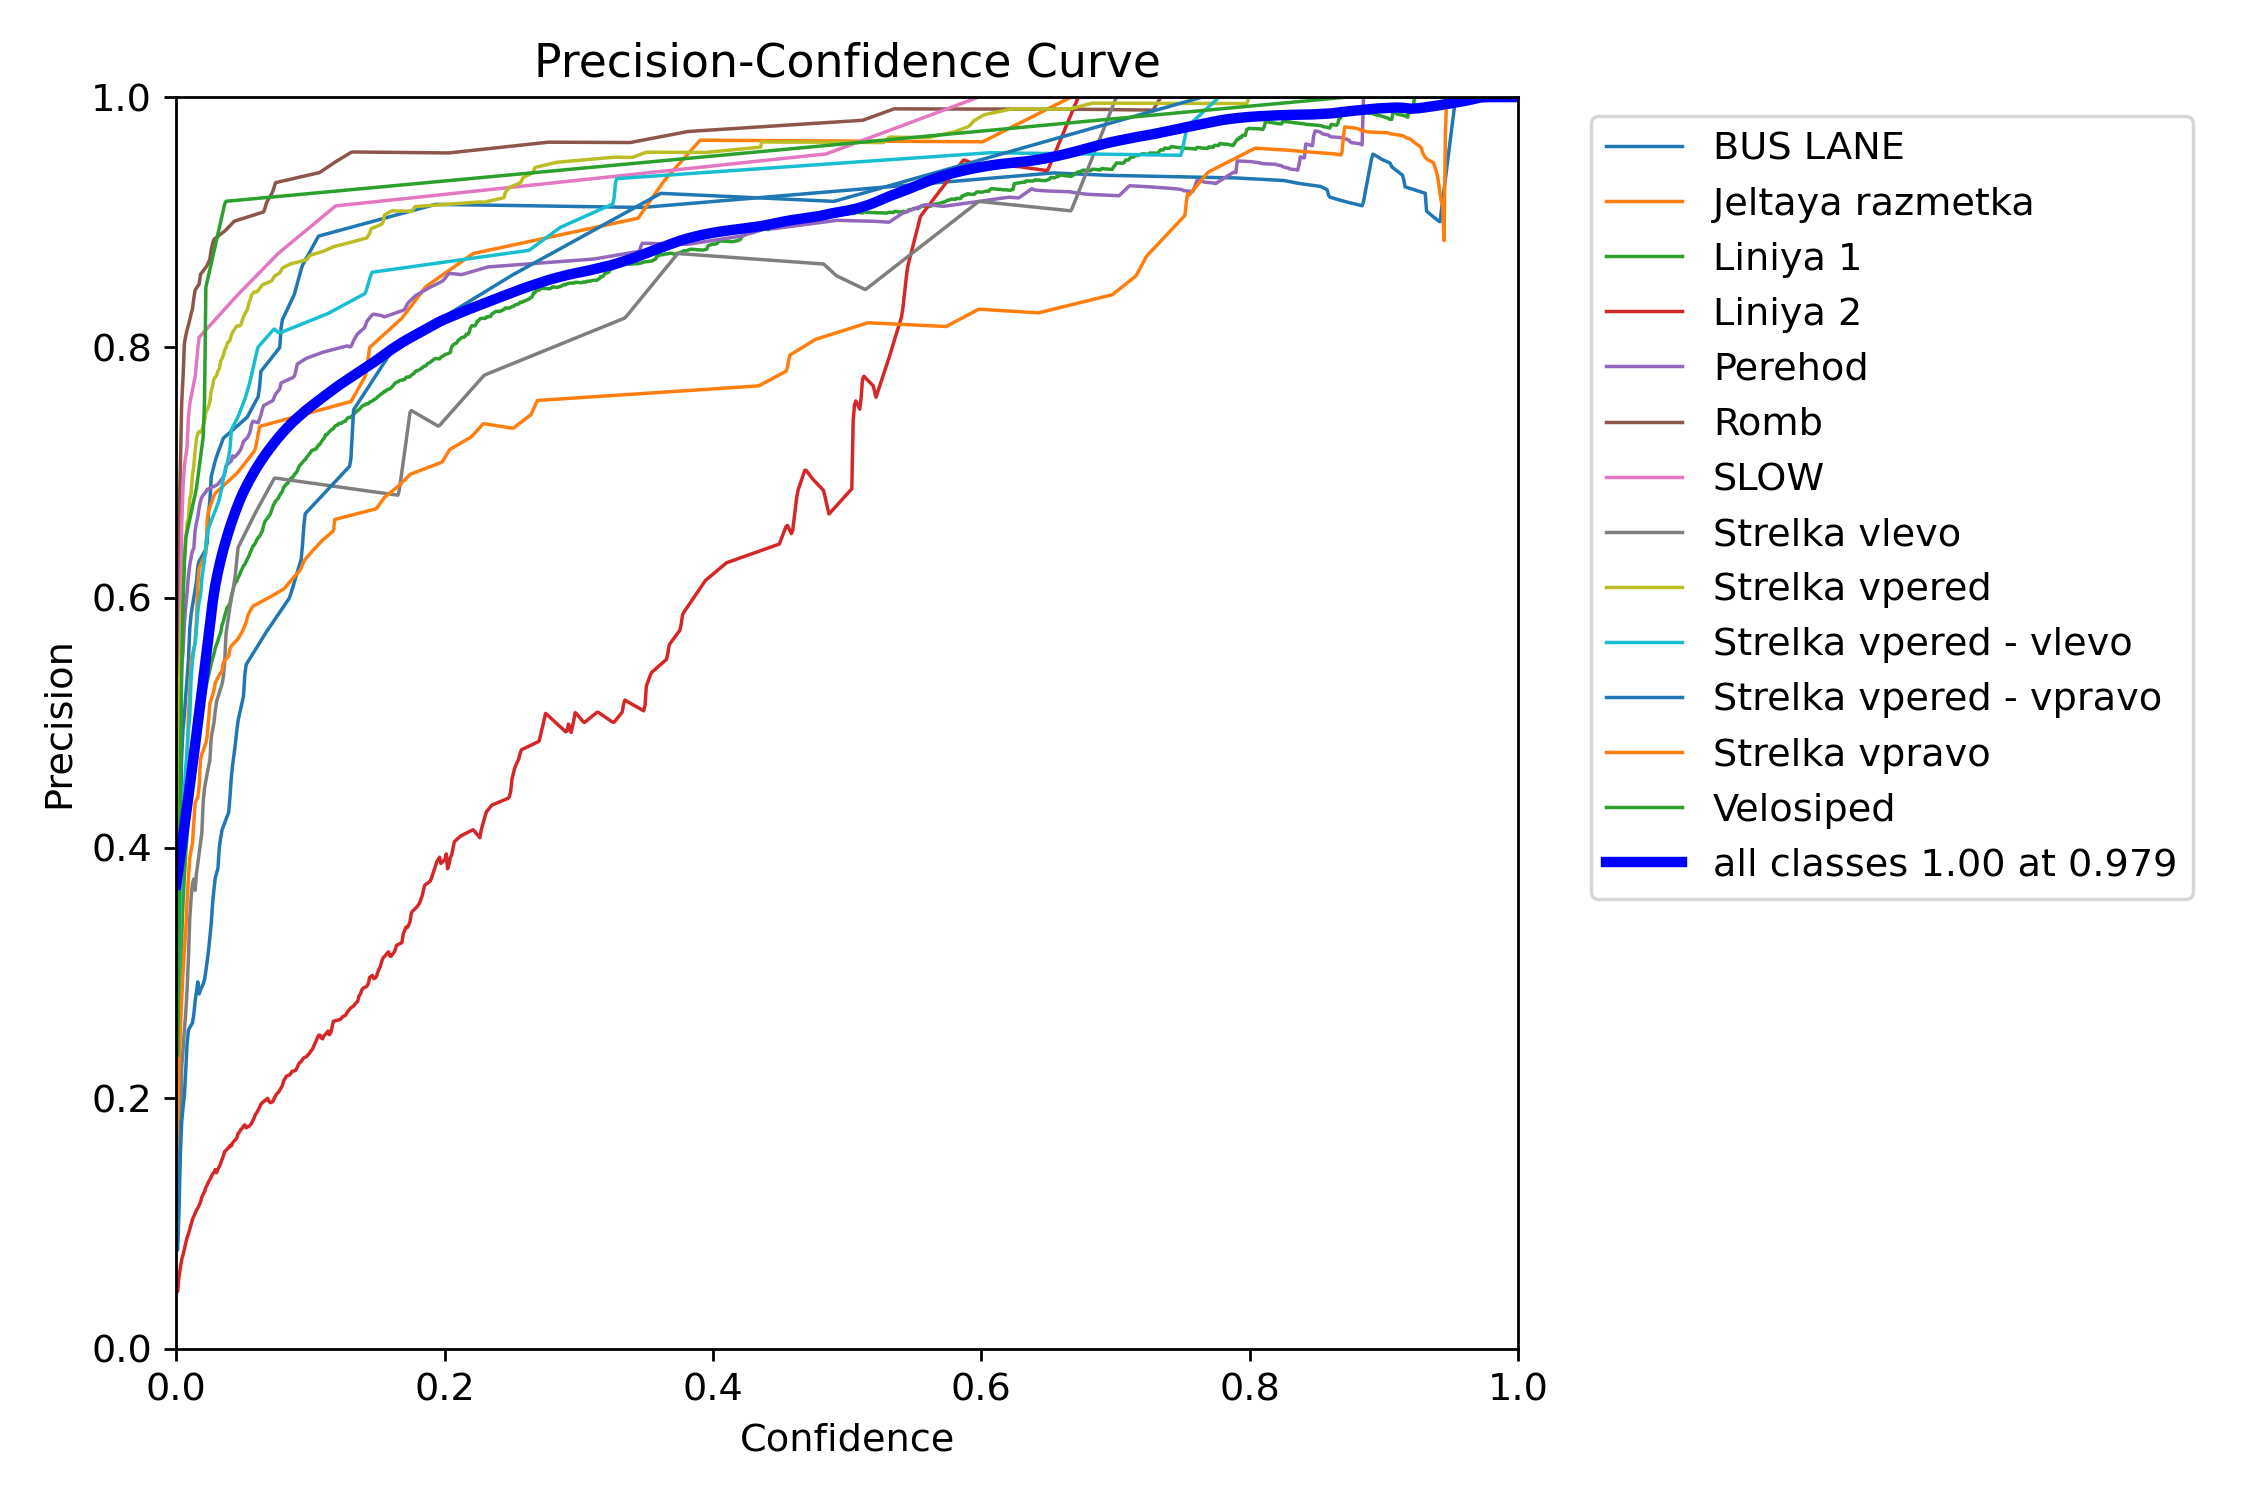

In [15]:
from IPython.display import Image
image_path = '/content/runs/detect/train/P_curve.png'
Image(filename=image_path)

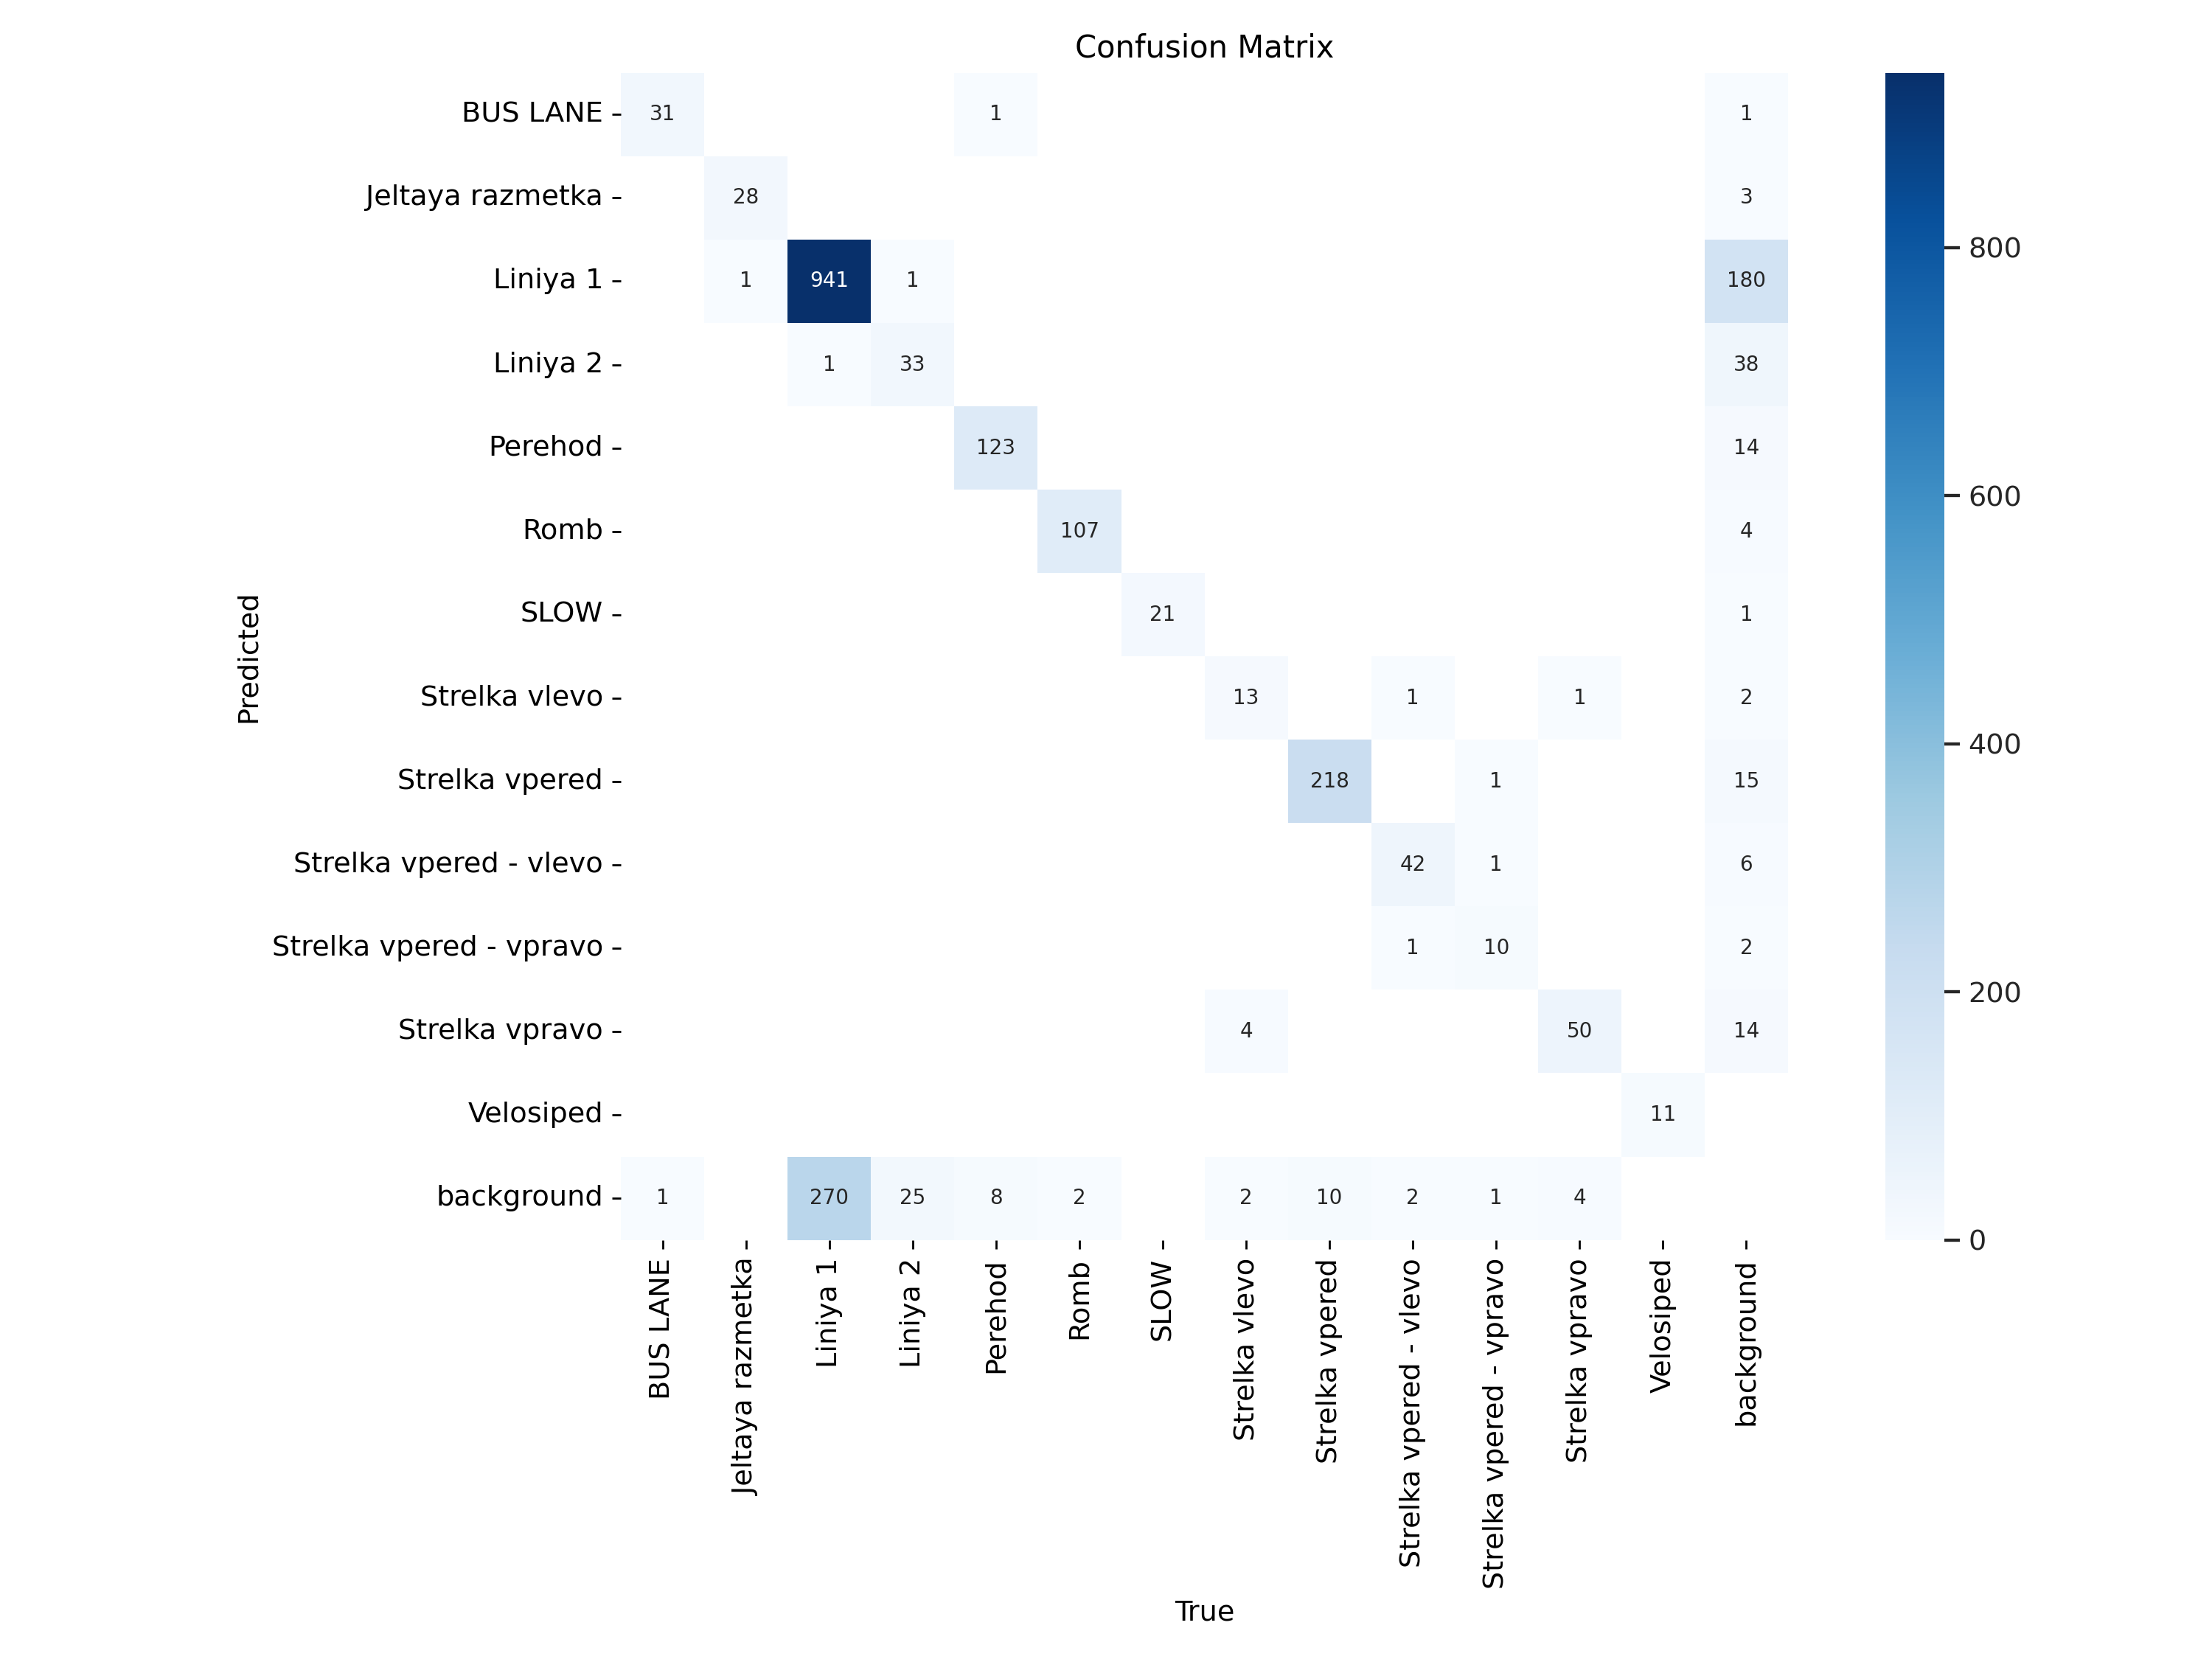

In [16]:
image_path = '/content/runs/detect/train/confusion_matrix.png'
Image(filename=image_path)

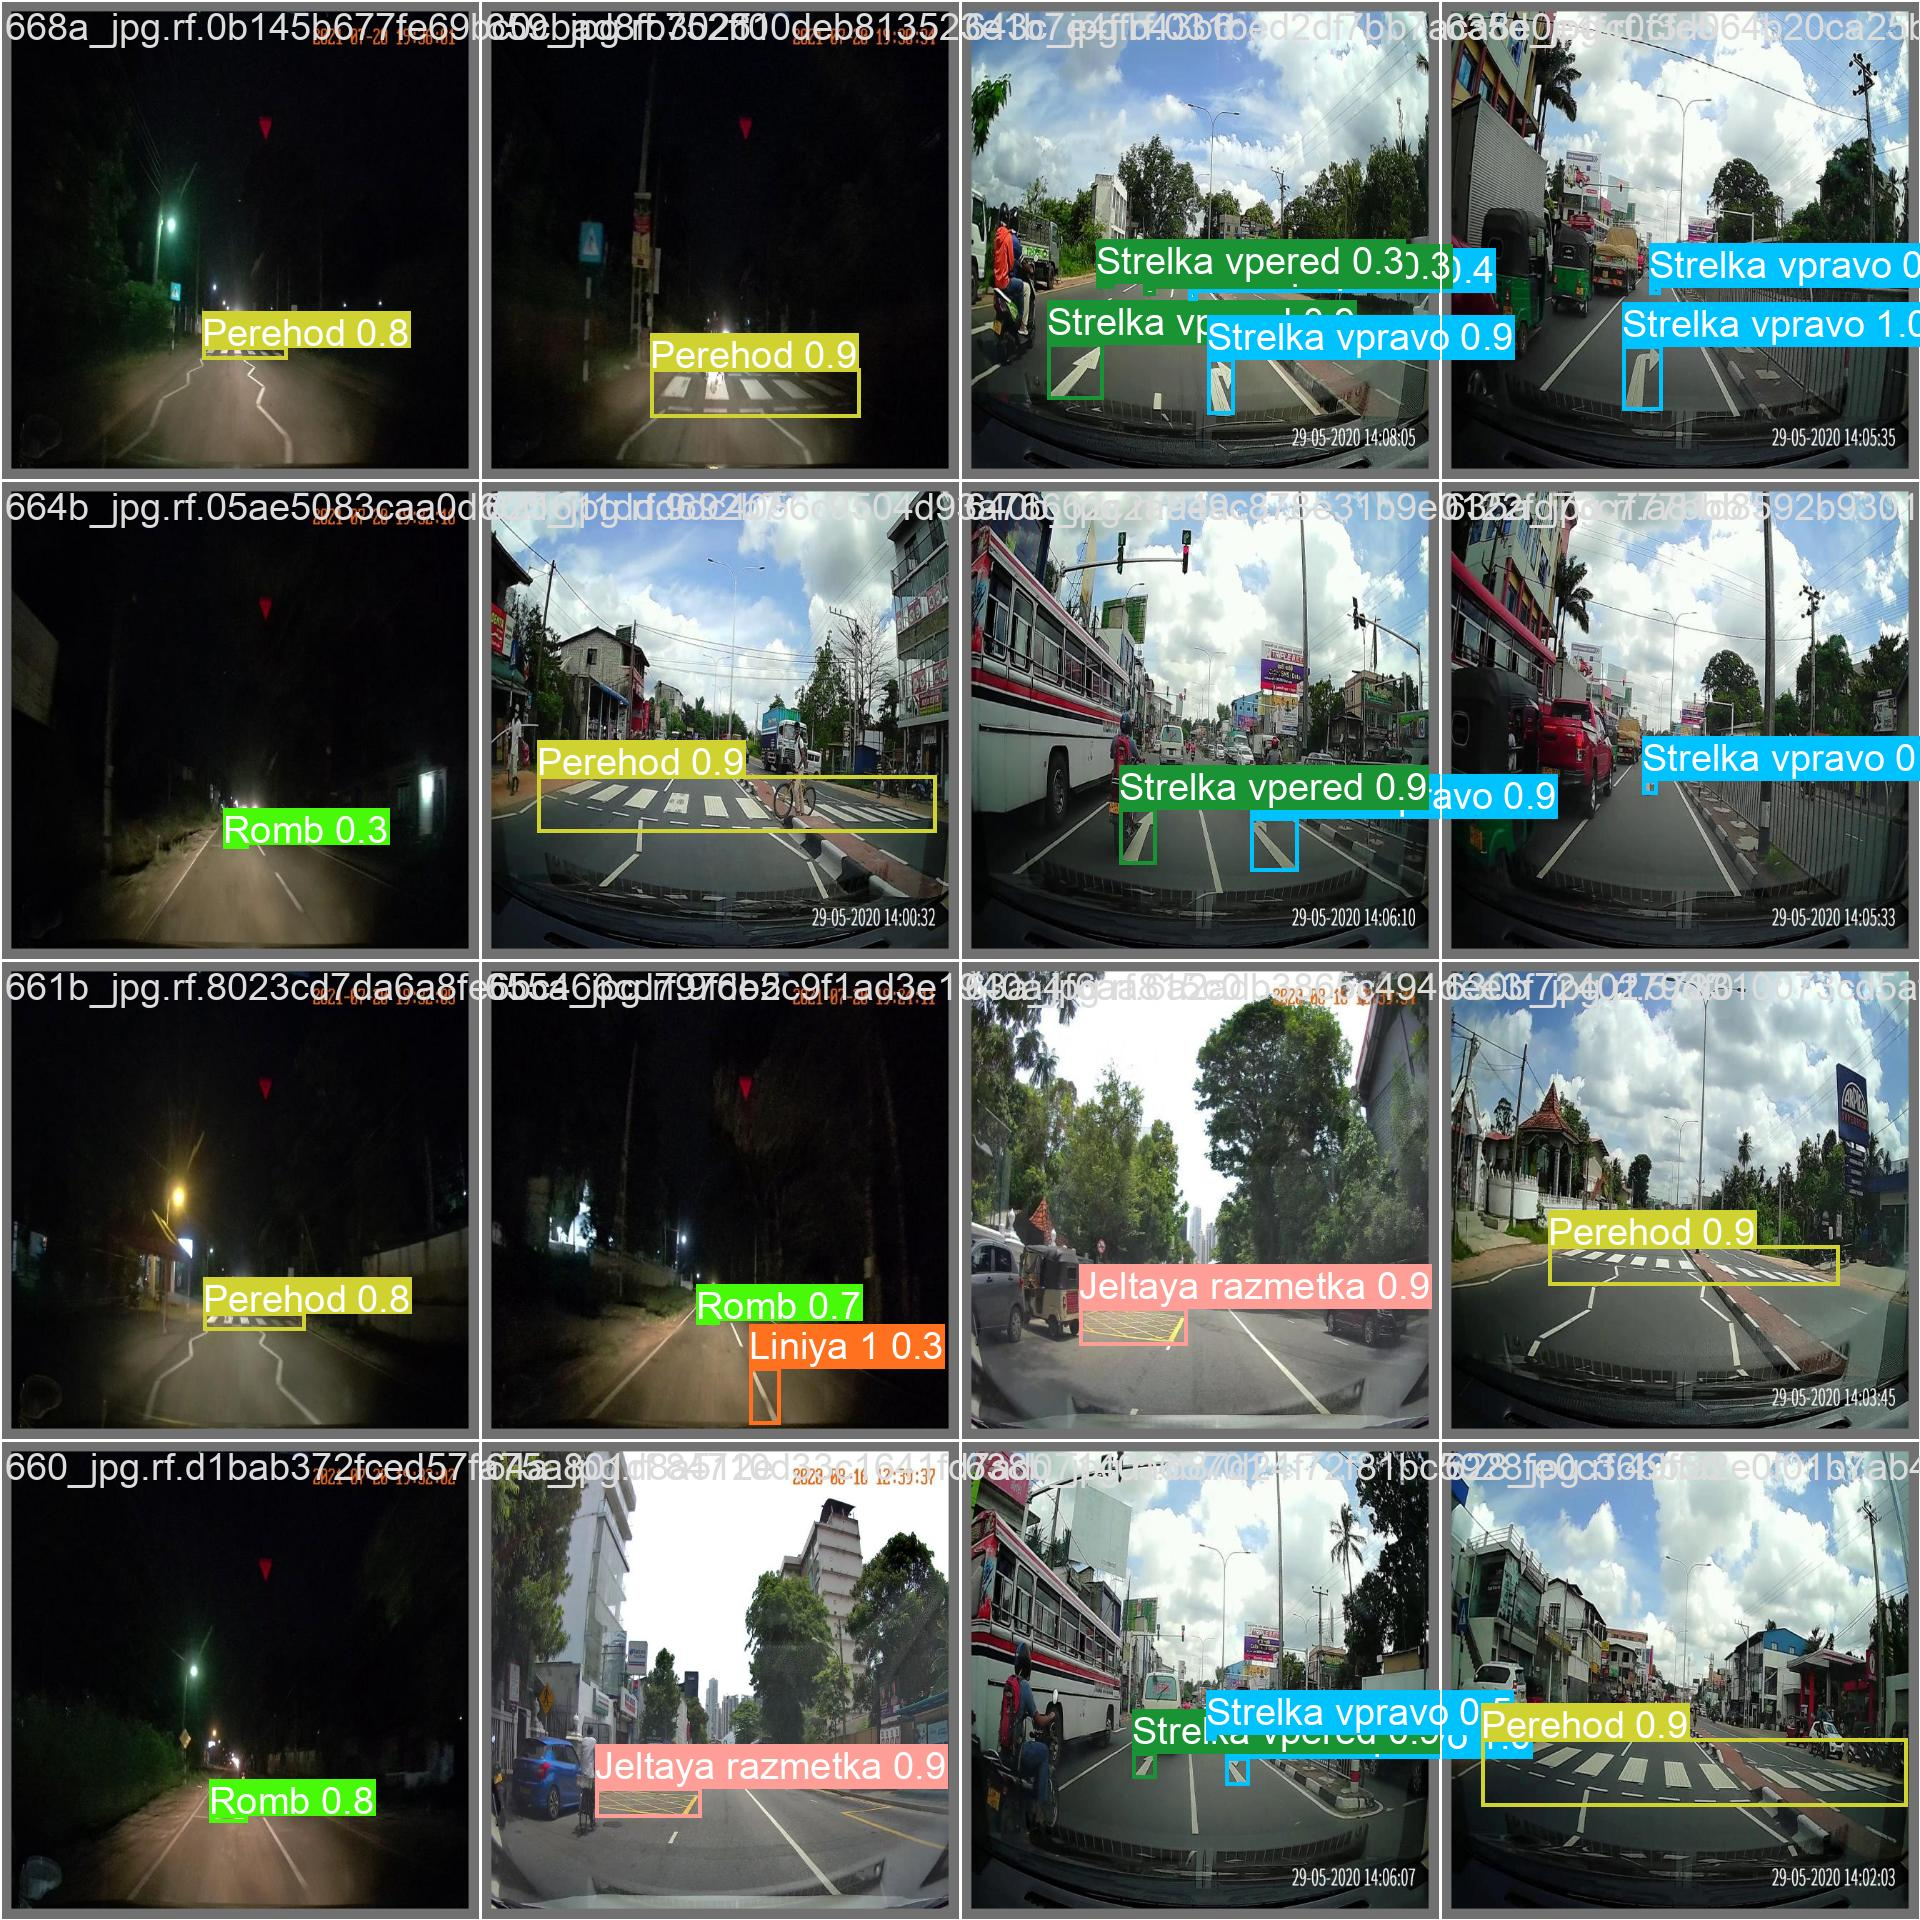

In [17]:
image_path = '/content/runs/detect/train/val_batch1_pred.jpg'
Image(filename=image_path)

In [18]:

def plot_images(x , n):
    path = glob.glob(x)
    res = model_best.predict(path[:n])
    for i in range(n):
        detect = res[i]
        img = Image.fromarray(detect.plot())
        plt.figure(dpi=100)
        plt.imshow(img)
        plt.axis("off")
        plt.tight_layout()
        plt.show()

Train Images


0: 640x640 6 Liniya 1s, 1 Liniya 2, 2 Strelka vpereds, 63.1ms
Speed: 2.3ms preprocess, 63.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


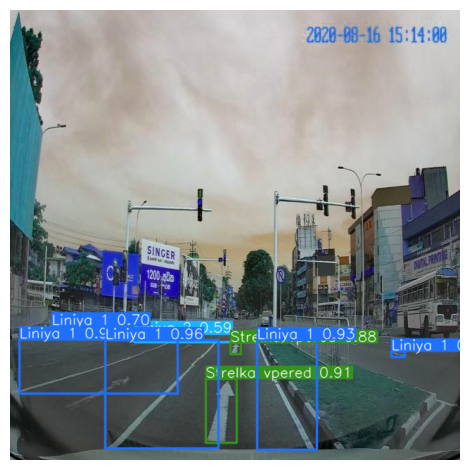

In [ ]:
plot_images("/content/train/images/116c_jpg.rf.64ad3af45949fffb9ab419fb838567e0.jpg",1)


0: 640x640 5 Liniya 1s, 1 Liniya 2, 4 Strelka vpereds, 2 Strelka vpered - vlevos, 1 Strelka vpravo, 63.2ms
Speed: 1.6ms preprocess, 63.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


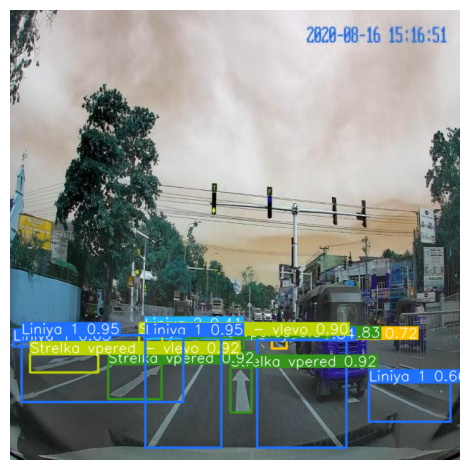

In [ ]:
plot_images("/content/train/images/136c_jpg.rf.76d4c6dc725251946a48fad7f698a255.jpg",1)

Test Images


0: 640x640 7 Liniya 1s, 2 Rombs, 63.0ms
Speed: 1.5ms preprocess, 63.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


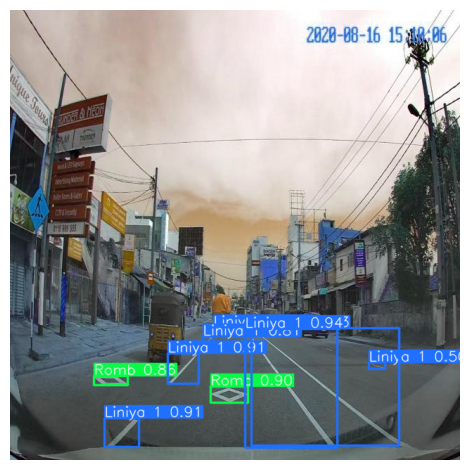

In [ ]:
plot_images("/content/test/images/107_jpg.rf.29a741c343edd1f0eb2febb82f61acfe.jpg",1)


0: 640x640 1 Strelka vpered, 1 Strelka vpravo, 63.3ms
Speed: 1.9ms preprocess, 63.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


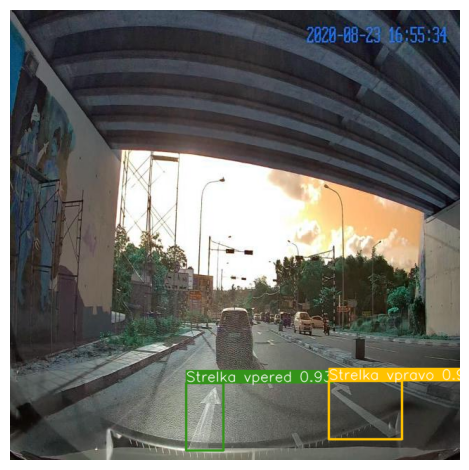

In [ ]:
plot_images("/content/test/images/239c_jpg.rf.c306ba866a8f81c260e426ada55f5f7e.jpg",1)


0: 640x640 2 Liniya 1s, 1 Strelka vpravo, 67.3ms
Speed: 11.8ms preprocess, 67.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


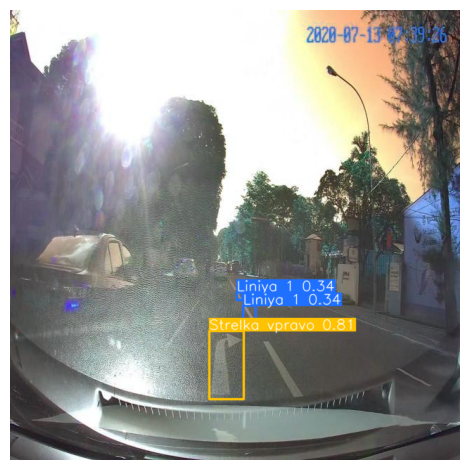

In [ ]:
plot_images("/content/test/images/324_jpg.rf.0f39ccd7862809945410f1414b3f3f2c.jpg",1)


0: 640x640 2 Liniya 1s, 1 Strelka vpered - vlevo, 65.2ms
Speed: 1.9ms preprocess, 65.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


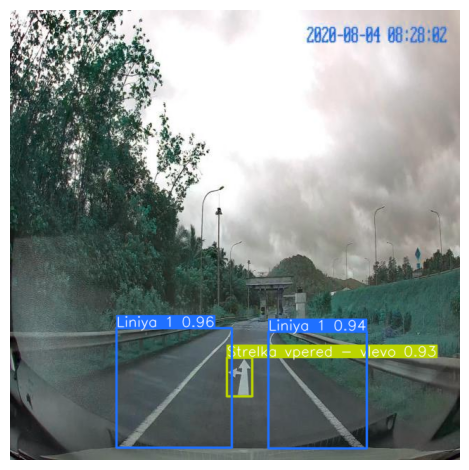

In [ ]:
plot_images("/content/test/images/504_jpg.rf.8fce4dd6fdc8da6691df97cda960c783.jpg",1)

Valid Images


0: 640x640 1 BUS LANE, 6 Liniya 1s, 3 Rombs, 1 Strelka vpered, 69.4ms
Speed: 11.2ms preprocess, 69.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


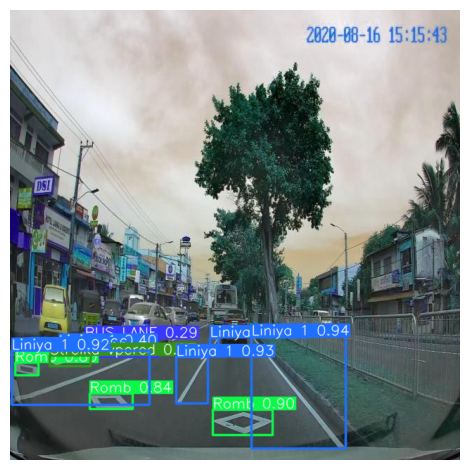

In [ ]:
plot_images("/content/valid/images/125b_jpg.rf.59ad74a71e71a757896702cc0a5e5361.jpg",1)


0: 640x640 1 BUS LANE, 4 Liniya 1s, 100.9ms
Speed: 2.0ms preprocess, 100.9ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


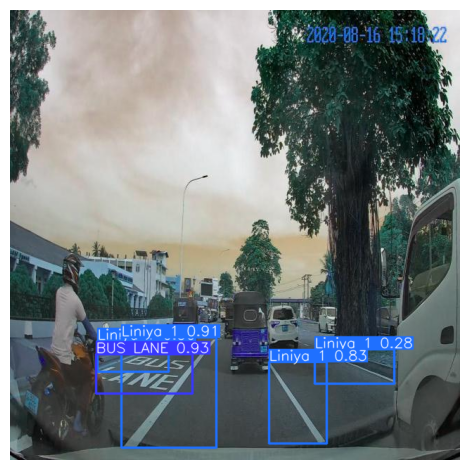

In [ ]:
plot_images("/content/valid/images/152_jpg.rf.f587e6229612cccaf2453c3372ee75a4.jpg",1)


0: 640x640 1 Perehod, 65.2ms
Speed: 1.9ms preprocess, 65.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


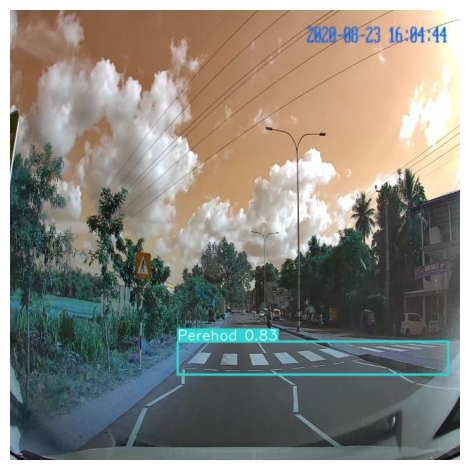

In [ ]:
plot_images("/content/valid/images/194_jpg.rf.ec9f141189c1a0ceb4580e41cbadbb0b.jpg",1)


0: 640x640 3 Liniya 1s, 1 Strelka vpered - vlevo, 1 Strelka vpravo, 94.7ms
Speed: 3.9ms preprocess, 94.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


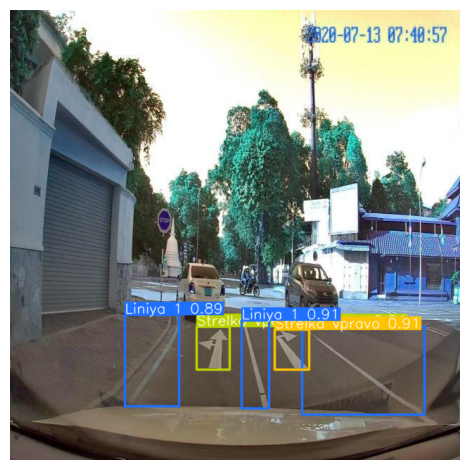

In [ ]:
plot_images("/content/valid/images/326_jpg.rf.3b829758c55851e38eecd528f228a64c.jpg",1)